<a href="https://colab.research.google.com/github/makemepro/python_projects/blob/main/vaccine_delivery_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 3: Delivering COVID Vaccines to CVS locations (Spring 2021)**

**TRAVELING SALESMAN PROBLEM USING OR-TOOLS**

**OPIM 5641: Business Decision Modeling - University of Connecticut**

## Problem Statement

Imagine that you are in charge of vaccine distribution in 20 towns for the State of Connecticut. You have a distribution center set up at the Connecticut State Capitol (41.76428988852701, -72.68249918399205) and you will deliver the COVID vaccines to CVS stores in the shortest amount of distance (so that none of the vaccines will spoil).

## Traveling Salesman Problem Description

The TSP can be defined as follows: for a given list of cities and the distances between each pair of them, we want to find the shortest possible route that goes to each city once and returns to the origin city.

We assume the cost of travel is same as the distance covered by the Salesperson who travels at constant speed.

There is a class of Traveling Salesman Problems that assumes that the distance of going from city i
to city j is the same as going form city j to city i, this type of Traveling Salesman Problem is also known as the symmetric Traveling Salesman Problem. In this example, we use Manhattan distances, but the TSP model formulation is valid independent of the way in which the individual distances are determined.
OR tools accepts Manhattan distances in determining more accurate optimal solutions.

## Adding solver for time calculation

In [ ]:
# In this notebook, I will want to check the amount of time spent in the execution of each cell, so I need to install an additional package
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.84 s (started: 2021-04-28 10:35:10 +00:00)


In [ ]:
# Start Timer
import time
start = time.time() # Start time noted

time: 1.58 ms (started: 2021-04-28 10:35:17 +00:00)


### Setting up our Environment/Imports

In [ ]:
# importing pandas and numpy for operations
import pandas as pd  #dataframes
import numpy as np #arrays

time: 1.32 ms (started: 2021-04-28 10:35:20 +00:00)


In [ ]:
# importing packages to calculate location distances
from sklearn.metrics.pairwise import manhattan_distances # manhattan distances
from math import radians

time: 1.26 ms (started: 2021-04-28 10:35:23 +00:00)


In [ ]:
# importing packages to plot maps and plots
import matplotlib.pyplot as plt
import seaborn as sns
# plotly packages
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
from pylab import *

time: 2.91 ms (started: 2021-04-28 10:35:26 +00:00)


## Data Preparation

In [ ]:
# Reading data from the .csv file on google drive
# https://drive.google.com/file/d/10Bu4-12OXHj3SQjv-Gf11ptVDTwEA8BW/view?usp=sharing

!gdown --id 10Bu4-12OXHj3SQjv-Gf11ptVDTwEA8BW

Downloading...
From: https://drive.google.com/uc?id=10Bu4-12OXHj3SQjv-Gf11ptVDTwEA8BW
To: /content/cvsStores.csv
100% 2.97k/2.97k [00:00<00:00, 2.48MB/s]
time: 730 ms (started: 2021-04-28 10:35:32 +00:00)


In [ ]:
# Extracting data from the file
# Transform excel file in a pandas dataframe
df = pd.read_csv('cvsStores.csv')

# Verifying the extracted data
print(df)

                 Town  StoreNumber  ...        Lat        Lon
0       State Capitol            1  ...  41.764290 -72.682499
1     Glastonbury (1)          459  ...  41.715477 -72.611455
2     Glastonbury (2)         5450  ...  41.705379 -72.593939
3      Kensington (1)         2119  ...  41.631274 -72.759555
4         Clinton (1)         1284  ...  41.279014 -72.528462
5   West Hartford (1)         1038  ...  41.761075 -72.716118
6   West Hartford (2)        11072  ...  41.785493 -72.746118
7   West Hartford (3)         1156  ...  41.755341 -72.766498
8   West Hartford (4)        17777  ...  41.784085 -72.747909
9   West Hartford (5)         2153  ...  41.752219 -72.743406
10  West Hartford (6)          333  ...  41.761796 -72.744077
11  West Hartford (7)          671  ...  41.731846 -72.730051
12     New Canaan (1)         1213  ...  41.146379 -73.495169
13  Old Greenwich (1)         1898  ...  41.031103 -73.567933
14         Darien (1)          918  ...  41.076428 -73.470430
15      

**Connecticut State Capitol should be the first row, which is where our distribution center is.**

It has randomly been assigned the StoreNumber 1.

In [ ]:
# Printing the first 10 rows of the data frame to verify the column names
df.head(n=10)

,Town,StoreNumber,Address,Lat,Lon
0,State Capitol,1,"210 Capitol Ave, Hartford, CT 06106",41.764290,-72.682499
1,Glastonbury (1),459,"2639 Main St. Glastonbury, CT 06033",41.715477,-72.611455
2,Glastonbury (2),5450,"766 New London Turnpike Glastonbury, CT 06033",41.705379,-72.593939
3,Kensington (1),2119,"1055 Farmington Avenue Kensington, CT 06037",41.631274,-72.759555
4,Clinton (1),1284,"17 West Main Street Clinton, CT 06413",41.279014,-72.528462
5,West Hartford (1),1038,"1044 Boulevard West Hartford, CT 06119",41.761075,-72.716118
6,West Hartford (2),11072,"344 N Main St West Hartford, CT 06117",41.785493,-72.746118
7,West Hartford (3),1156,"1240 Farmington Avenue West Hartford, CT 06107",41.755341,-72.766498
8,West Hartford (4),17777,"333 North Main St, Suite 10 West Hartford, CT ...",41.784085,-72.747909
9,West Hartford (5),2153,"150 South Main Street West Hartford, CT 06107",41.752219,-72.743406


time: 19.9 ms (started: 2021-04-28 10:35:43 +00:00)


In [ ]:
df.shape # Verifying the no of rows and columns

(34, 5)

time: 6.66 ms (started: 2021-04-28 10:36:00 +00:00)


In [ ]:
df.info() # Printing summary statistics
# The dataset has 34 rows and 5 columns. And all the columns have non-null values for each of their
# 34 rows. Therefore there are no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Town         34 non-null     object 
 1   StoreNumber  34 non-null     int64  
 2   Address      34 non-null     object 
 3   Lat          34 non-null     float64
 4   Lon          34 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ KB
time: 8.93 ms (started: 2021-04-28 10:36:04 +00:00)


In [ ]:
df.reset_index(inplace=True) # reset index

time: 5.63 ms (started: 2021-04-28 10:36:09 +00:00)


In [ ]:
# plotting the towns on an interactive map
fig = px.scatter_mapbox(df, lat="Lat", lon="Lon", color="Town",zoom=8.25) #easy format to draw maps on plotly
fig.update_layout(mapbox_style="carto-darkmatter",title="Map for CVS Stores across cities")
config = dict({'scrollZoom': False}) #stopped zoom config for standard view capture
fig.show(config=config)

time: 518 ms (started: 2021-04-28 10:36:13 +00:00)


In [ ]:
# X-longitude,Y-latitude
geogTable = df[['Town','Lon','Lat']]
geogTable

,Town,Lon,Lat
0,State Capitol,-72.682499,41.764290
1,Glastonbury (1),-72.611455,41.715477
2,Glastonbury (2),-72.593939,41.705379
3,Kensington (1),-72.759555,41.631274
4,Clinton (1),-72.528462,41.279014
5,West Hartford (1),-72.716118,41.761075
6,West Hartford (2),-72.746118,41.785493
7,West Hartford (3),-72.766498,41.755341
8,West Hartford (4),-72.747909,41.784085
9,West Hartford (5),-72.743406,41.752219


time: 25.4 ms (started: 2021-04-28 10:36:37 +00:00)


In [ ]:
# Make a back-up of the original XY data...
geogTable_orig = geogTable

time: 872 µs (started: 2021-04-28 10:36:53 +00:00)


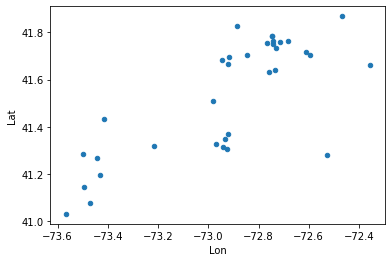

time: 169 ms (started: 2021-04-28 10:36:56 +00:00)


In [ ]:
# 2D map of the cities...
geogTable.plot.scatter(x='Lon', y='Lat') #x=long,Y=lat here
plt.show()

### Using OR Tools

#### Installing OR Tools package

In [ ]:
!pip install ortools

time: 2.84 s (started: 2021-04-28 10:37:10 +00:00)


**Traveling Salesman Problem is a model of simple Vehicle Routing Problem with one Vehicle and no Depot**

### Calculating Manhattan Distances

In [ ]:
from sklearn.metrics.pairwise import manhattan_distances
# got the same result!

geogDist1=np.round(manhattan_distances(geogTable[['Lon', 'Lat']])* 6371000/1000)  # multiply by Earth radius to get kilometers
# distances are rounded to the nearest integer, since the routing solver does all computations with integers
geogDist1

array([[   0.,  764.,  940., ..., 6249., 4252., 4039.],
       [ 764.,    0.,  176., ..., 6390., 4393., 4181.],
       [ 940.,  176.,    0., ..., 6437., 4440., 4228.],
       ...,
       [6249., 6390., 6437., ...,    0., 1997., 2209.],
       [4252., 4393., 4440., ..., 1997.,    0.,  212.],
       [4039., 4181., 4228., ..., 2209.,  212.,    0.]])

time: 11.7 ms (started: 2021-04-28 10:37:16 +00:00)


In [ ]:
# geogDistTemp=pd.DataFrame(geogDist1,index=df['Town'],columns=df['Town']) #distance matrix

time: 1.07 ms (started: 2021-04-28 10:37:20 +00:00)


In [ ]:
# np.fill_diagonal(geogDistTemp.values, 99999)

time: 741 µs (started: 2021-04-28 10:37:22 +00:00)


In [ ]:
# geogDistTemp #it worked

time: 744 µs (started: 2021-04-28 10:37:24 +00:00)


In [ ]:
# now convert back to numpy array
# geogDistTemp = np.array(geogDistTemp)
# geogDistTemp

time: 1.09 ms (started: 2021-04-28 10:37:28 +00:00)


### Importing Google OR tools solver packages

In [ ]:
# [START import]

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

# [END import]

time: 1.38 ms (started: 2021-04-28 10:37:32 +00:00)


### Creating Distance matrix

**Depot is the first row in the data model.**

In [ ]:
# [START data_model]

def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = geogDist1 # cost matrix with integer values
    data['num_vehicles'] = 1 # The number of vehicles is 1 because this is a TSP
    data['depot'] = 0 # The start and end location for the route. In this case, the depot is 0, which corresponds to State Capitol.
    return data

# [END data_model]

time: 3.06 ms (started: 2021-04-28 10:37:36 +00:00)


### Print_Solution function

In [ ]:
# [START solution_printer]

def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} km'.format(solution.ObjectiveValue())) # printing objective function
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    tsp=[] # solution matrix
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        tsp.append(manager.IndexToNode(index)) # adding solution
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}km\n'.format(route_distance)
    return tsp

# [END solution_printer]

time: 13.5 ms (started: 2021-04-28 10:37:40 +00:00)


### Creating the data model

In [ ]:
# Instantiate the data problem.
# [START data]

data = create_data_model() # create model

# [END data]

time: 1.35 ms (started: 2021-04-28 10:37:44 +00:00)


In [ ]:
# Check your work!
data

{'depot': 0,
 'distance_matrix': array([[   0.,  764.,  940., ..., 6249., 4252., 4039.],
        [ 764.,    0.,  176., ..., 6390., 4393., 4181.],
        [ 940.,  176.,    0., ..., 6437., 4440., 4228.],
        ...,
        [6249., 6390., 6437., ...,    0., 1997., 2209.],
        [4252., 4393., 4440., ..., 1997.,    0.,  212.],
        [4039., 4181., 4228., ..., 2209.,  212.,    0.]]),
 'num_vehicles': 1}

time: 5.18 ms (started: 2021-04-28 10:37:46 +00:00)


### Creating the Routing Index Manager and Routing Model.

In [ ]:
# Create the routing index manager.
# [START index_manager]

manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['num_vehicles'], data['depot'])

# [END index_manager]

# Create Routing Model.
# [START routing_model]

routing = pywrapcp.RoutingModel(manager)

# [END routing_model]

time: 6.83 ms (started: 2021-04-28 10:37:53 +00:00)


### Linking nodes with distance and a callback

In [ ]:
# [START transit_callback]

def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix Node Index.
    from_node = manager.IndexToNode(from_index) #link nodes with distance
    to_node = manager.IndexToNode(to_index)     #new distance matrix that OR tools understand
    return data['distance_matrix'][from_node][to_node]

#set a callback to the distance or cost function
transit_callback_index = routing.RegisterTransitCallback(distance_callback)
# [END transit_callback]

time: 5.35 ms (started: 2021-04-28 10:37:57 +00:00)


### Defining cost of each arc

In [ ]:
# Define cost of each arc.
# [START arc_cost]

routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index) #use that callback to configure the objective heuristic(cost)

# [END arc_cost]

time: 2.12 ms (started: 2021-04-28 10:38:02 +00:00)


## Scenario 1: Automatic

(just accept all defaults)

**Setting first solution heuristic**

**Local search options**

In [ ]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters() # Setting default parameters for TSP
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.AUTOMATIC) # "Automatic" solution strategy alogrithm used
search_parameters.time_limit.seconds = 30
search_parameters.log_search = True

time: 2.75 ms (started: 2021-04-28 10:38:13 +00:00)


#### First solution strategy options

In [ ]:
# [START parameters]

search_parameters = pywrapcp.DefaultRoutingSearchParameters() #setting default parameters for TSP   #more options in VRP
search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.AUTOMATIC) # set it to AUTOMATIC mode for strategy


# [END parameters]


time: 2.12 ms (started: 2021-04-28 10:38:17 +00:00)


#### Running the solver

In [ ]:
# [START solve]

# Solve the problem.
solution = routing.SolveWithParameters(search_parameters) #solve with those parameters

# [END solve]


time: 43.3 ms (started: 2021-04-28 10:38:21 +00:00)


#### Printing the solution

In [ ]:
# [START print_solution]

#use the print function generated before to print the solution & add to tsp array
if solution:
    tsp1=print_solution(manager, routing, solution)

# [END print_solution]

Objective: 31868 km
Route for vehicle 0:
 0 -> 5 -> 10 -> 6 -> 8 -> 7 -> 9 -> 11 -> 17 -> 3 -> 27 -> 15 -> 25 -> 26 -> 24 -> 28 -> 16 -> 30 -> 12 -> 13 -> 14 -> 23 -> 29 -> 31 -> 20 -> 19 -> 32 -> 33 -> 18 -> 4 -> 22 -> 21 -> 2 -> 1 -> 0

time: 4.1 ms (started: 2021-04-28 10:38:25 +00:00)


In [ ]:
tsp1=np.array(tsp1)
tsp1 #solution array

array([ 0,  5, 10,  6,  8,  7,  9, 11, 17,  3, 27, 15, 25, 26, 24, 28, 16,
       30, 12, 13, 14, 23, 29, 31, 20, 19, 32, 33, 18,  4, 22, 21,  2,  1])

time: 8.52 ms (started: 2021-04-28 10:38:34 +00:00)


In [ ]:
# now reindex the original data
geogTable_orig2 = geogTable_orig.reindex(tsp1)

# Adding an additional row with the coordinates of State Capitol (Distribution Center), such that
# The succeeding visualizations depict the shortest route beginning and ending at the State Capitol
geogTable_orig2.loc[len(geogTable_orig2.index)] = geogTable_orig2.iloc[0,:]
# geogTable_orig2.loc[23,:]=geogTable_orig2.iloc[0,:]
geogTable_orig2

,Town,Lon,Lat
0,State Capitol,-72.682499,41.764290
5,West Hartford (1),-72.716118,41.761075
10,West Hartford (6),-72.744077,41.761796
6,West Hartford (2),-72.746118,41.785493
8,West Hartford (4),-72.747909,41.784085
7,West Hartford (3),-72.766498,41.755341
9,West Hartford (5),-72.743406,41.752219
11,West Hartford (7),-72.730051,41.731846
17,Berlin (1),-72.733968,41.641177
3,Kensington (1),-72.759555,41.631274


time: 44 ms (started: 2021-04-28 10:38:37 +00:00)


#### Visualizing the solution

In [ ]:
mean(geogTable_orig2['Lon']) #for center of Map-mean longitude

-72.92373695457144

time: 7.61 ms (started: 2021-04-28 10:38:55 +00:00)


In [ ]:
mean(geogTable_orig2['Lat']) #for center of Map-mean latitude

41.53883435142858

time: 10.2 ms (started: 2021-04-28 10:38:59 +00:00)


In [ ]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig2['Lon'],
    lat = geogTable_orig2['Lat'],
    name="Main Route",
    hovertext=geogTable_orig2['Town'],
    marker = {'size': 10}))

for i in range(len(geogTable_orig2)):
  fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = [geogTable_orig2.iloc[i,1],geogTable_orig2.iloc[i-1,1]],
    lat = [geogTable_orig2.iloc[i,2],geogTable_orig2.iloc[i-1,2]],
    name="Route"+str(i),
    text=[geogTable_orig2.iloc[i,0]+'-'+str(i),geogTable_orig2.iloc[i-1,0]+'-'+str(i-1)],
    textposition='top center',
    marker = {'size': 10}))

fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=8.25, mapbox_center_lat = 41.26878471063158,mapbox_center_lon = -73.37656607409332,
    margin={"r":0,"t":0,"l":0,"b":0},title="TRAVELING SALESMAN ROUTE")
config = dict({'scrollZoom': False})
fig.show(config=config)


time: 337 ms (started: 2021-04-28 10:39:26 +00:00)


#### Animated Solution

In [ ]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig2['Lon'], #longitude
    lat = geogTable_orig2['Lat'], #latitude
    name="Traveling Salesman",
    hovertext=geogTable_orig2['Town'], #town name
    marker = {'size': 10}),
    layout=go.Layout(
        hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
        frames=[go.Frame(
        data=[go.Scattermapbox(
            lon=[geogTable_orig2.iloc[k,1]],
            lat=[geogTable_orig2.iloc[k,2]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(len(geogTable_orig2))]
)
fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig2['Lon'], #longitude
    lat = geogTable_orig2['Lat'], #latitude
    name="Main Route",
    hovertext=geogTable_orig2['Town'], #town name
    marker=dict(color="blue", size=5)))


fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=8.25, mapbox_center_lat = 41.26878471063158,mapbox_center_lon = -73.37656607409332,
    margin={"r":0,"t":0,"l":0,"b":0},title="TRAVELING SALESMAN ROUTE")
config = dict({'scrollZoom': False})
fig.show(config=config)

time: 2.6 s (started: 2021-04-28 10:39:57 +00:00)


In [ ]:
print('Minimum distance: {} km'.format(solution.ObjectiveValue())) #Minimum distance covered (or) Minimum Cost= 31868 Kms

Minimum distance: 31868 km
time: 1.24 ms (started: 2021-04-28 10:40:28 +00:00)


## Scenario 2: Try a different first solution strategy

Using PATH_MOST_CONSTRAINED_ARC solution strategy.
Similar to PATH_CHEAPEST_ARC, but arcs are evaluated with a comparison-based selector which will favor the most constrained arc first.

**Setting first solution heuristic**

**Local search options**

In [ ]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters() # Setting default parameters for TSP
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.AUTOMATIC) # "Automatic" solution strategy alogrithm used
search_parameters.time_limit.seconds = 30 # limit the search time while using metaheuristics, else the solver will not terminate
search_parameters.log_search = True

time: 3.49 ms (started: 2021-04-28 10:40:40 +00:00)


#### First solution strategy options

In [ ]:
# [START parameters]

search_parameters = pywrapcp.DefaultRoutingSearchParameters() #setting default parameters for TSP   #more options in VRP

# Using the PATH_MOST_CONSTRAINED_ARC solution strategy
search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_MOST_CONSTRAINED_ARC) # set it to PATH_MOST_CONSTRAINED_ARC mode for strategy

# [END parameters]


time: 2.79 ms (started: 2021-04-28 10:40:43 +00:00)


#### Running the solver

In [ ]:
# [START solve]

# Solve the problem.
solution = routing.SolveWithParameters(search_parameters) # solve with those parameters

# [END solve]


time: 31.1 ms (started: 2021-04-28 10:40:47 +00:00)


#### Printing the solution

In [ ]:
# [START print_solution]

#use the print function generated before to print the solution & add to tsp array
if solution:
    tsp2=print_solution(manager, routing, solution)

# [END print_solution]

Objective: 31868 km
Route for vehicle 0:
 0 -> 1 -> 2 -> 21 -> 22 -> 4 -> 18 -> 33 -> 32 -> 19 -> 20 -> 31 -> 29 -> 23 -> 14 -> 13 -> 12 -> 30 -> 16 -> 28 -> 24 -> 26 -> 25 -> 15 -> 27 -> 3 -> 17 -> 11 -> 9 -> 7 -> 8 -> 6 -> 10 -> 5 -> 0

time: 5.67 ms (started: 2021-04-28 10:40:51 +00:00)


**The path reamins effectively the same in comparison with the previous solution. The solution traverses the same path however in the opposite direction.**

*Previous Solution*: **0 -> 5 -> 10 -> 6** -> 8 -> 7 -> 9 -> 11 -> 17 -> 3 -> 27 -> 15 -> 25 -> 26 -> 24 -> 28 -> 16 -> 30 -> 12 -> 13 -> 14 -> 23 ->
29 -> 31 -> 20 -> 19 -> 32 -> 33 -> 18 -> 4 -> 22 -> 21 -> 2 -> 1 -> 0

*Current Solution*: 0 -> 1 -> 2 -> 21 -> 22 -> 4 -> 18 -> 33 -> 32 -> 19 -> 20 -> 31 -> 29 -> 23 -> 14 -> 13 -> 12 -> 30 -> 16 -> 28 -> 24 ->
26 -> 25 -> 15 -> 27 -> 3 -> 17 -> 11 -> 9 -> 7 -> 8 **-> 6 -> 10 -> 5 -> 0**



In [ ]:
tsp2=np.array(tsp2)
tsp2 #solution array

array([ 0,  1,  2, 21, 22,  4, 18, 33, 32, 19, 20, 31, 29, 23, 14, 13, 12,
       30, 16, 28, 24, 26, 25, 15, 27,  3, 17, 11,  9,  7,  8,  6, 10,  5])

time: 12 ms (started: 2021-04-28 10:41:00 +00:00)


In [ ]:
# now reindex the original data
geogTable_orig3 = geogTable_orig.reindex(tsp2)

# Adding an additional row with the coordinates of State Capitol (Distribution Center), such that
# The succeeding visualizations depict the shortest route beginning and ending at the State Capitol
geogTable_orig3.loc[len(geogTable_orig3.index)] = geogTable_orig3.iloc[0,:]
# geogTable_orig2.loc[23,:]=geogTable_orig2.iloc[0,:]
geogTable_orig3

,Town,Lon,Lat
0,State Capitol,-72.682499,41.764290
1,Glastonbury (1),-72.611455,41.715477
2,Glastonbury (2),-72.593939,41.705379
21,Rockville (1),-72.467198,41.868254
22,Hebron (1),-72.355940,41.660280
4,Clinton (1),-72.528462,41.279014
18,New Haven (1),-72.925315,41.306292
33,Hamden (2),-72.919727,41.367527
32,Hamden (1),-72.932979,41.347439
19,New Haven (2),-72.939527,41.316188


time: 27.4 ms (started: 2021-04-28 10:41:03 +00:00)


#### Visualizing the solution

In [ ]:
mean(geogTable_orig3['Lon']) #for center of Map-mean longitude

-72.9237369545714

time: 5.51 ms (started: 2021-04-28 10:41:22 +00:00)


In [ ]:
mean(geogTable_orig3['Lat']) #for center of Map-mean latitude

41.53883435142857

time: 5.2 ms (started: 2021-04-28 10:41:25 +00:00)


In [ ]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig3['Lon'],
    lat = geogTable_orig3['Lat'],
    name="Main Route",
    hovertext=geogTable_orig3['Town'],
    marker = {'size': 10}))

for i in range(len(geogTable_orig3)):
  fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = [geogTable_orig3.iloc[i,1],geogTable_orig3.iloc[i-1,1]],
    lat = [geogTable_orig3.iloc[i,2],geogTable_orig3.iloc[i-1,2]],
    name="Route"+str(i),
    text=[geogTable_orig3.iloc[i,0]+'-'+str(i),geogTable_orig3.iloc[i-1,0]+'-'+str(i-1)],
    textposition='top center',
    marker = {'size': 10}))

fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=8.25, mapbox_center_lat = 41.26878471063158,mapbox_center_lon = -73.37656607409332,
    margin={"r":0,"t":0,"l":0,"b":0},title="TRAVELING SALESMAN ROUTE")
config = dict({'scrollZoom': False})
fig.show(config=config)


time: 341 ms (started: 2021-04-28 10:41:27 +00:00)


#### Animated Solution

In [ ]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig3['Lon'], #longitude
    lat = geogTable_orig3['Lat'], #latitude
    name="Traveling Salesman",
    hovertext=geogTable_orig3['Town'], #town name
    marker = {'size': 10}),
    layout=go.Layout(
        hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
        frames=[go.Frame(
        data=[go.Scattermapbox(
            lon=[geogTable_orig3.iloc[k,1]],
            lat=[geogTable_orig3.iloc[k,2]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(len(geogTable_orig3))]
)
fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig3['Lon'], #longitude
    lat = geogTable_orig3['Lat'], #latitude
    name="Main Route",
    hovertext=geogTable_orig3['Town'], #town name
    marker=dict(color="blue", size=5)))


fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=8.25, mapbox_center_lat = 41.26878471063158,mapbox_center_lon = -73.37656607409332,
    margin={"r":0,"t":0,"l":0,"b":0},title="TRAVELING SALESMAN ROUTE")
config = dict({'scrollZoom': False})
fig.show(config=config)

time: 2.85 s (started: 2021-04-28 10:41:49 +00:00)


In [ ]:
# Since the path is still the same, the minimum distance remains unchanged.
print('Minimum distance: {} km'.format(solution.ObjectiveValue())) #Minimum distance covered (or) Minimum Cost= 31868 Kms

Minimum distance: 31868 km
time: 1.16 ms (started: 2021-04-28 10:42:17 +00:00)


The path effectively remains the same however the order of towns and their corresponding CVS stores visited has changed.
For instance, the very first CVS store visited from the distribution center in the first scenario (with default or automatic values) was the at West Hartford (Store 1). The first CVS center to be visited in the path generated by the second approach is at Glastonbury (Store 1).
This strategy essentially traverses the same path although in the opposite direction.

## Scenario 3: Try a different local serach option

Using GREEDY_DESCENT search startegy.
Accepts improving (cost-reducing) local search neighbors until a local minimum is reached.

**Setting first solution heuristic**

**Local search options**

In [ ]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters() # Setting default parameters for TSP
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.GREEDY_DESCENT) # "Greedy Descent" local search startegy used
search_parameters.time_limit.seconds = 30 # limit the search time while using metaheuristics, else the solver will not terminate
search_parameters.log_search = True

time: 3.69 ms (started: 2021-04-28 10:42:32 +00:00)


#### First solution strategy options

In [ ]:
# [START parameters]

search_parameters = pywrapcp.DefaultRoutingSearchParameters() #setting default parameters for TSP   #more options in VRP
# search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.AUTOMATIC) # set it to AUTOMATIC mode for strategy
# Using the PATH_MOST_CONSTRAINED_ARC solution strategy
search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_MOST_CONSTRAINED_ARC) # set it to PATH_MOST_CONSTRAINED_ARC mode for strategy
# [END parameters]


time: 4.76 ms (started: 2021-04-28 10:42:40 +00:00)


#### Running the solver

In [ ]:
# [START solve]

# Solve the problem.
solution = routing.SolveWithParameters(search_parameters) # solve with those parameters

# [END solve]


time: 56.9 ms (started: 2021-04-28 10:42:44 +00:00)


#### Printing the solution

In [ ]:
# [START print_solution]

#use the print function generated before to print the solution & add to tsp array
if solution:
    tsp3=print_solution(manager, routing, solution)

# [END print_solution]

Objective: 31972 km
Route for vehicle 0:
 0 -> 1 -> 2 -> 21 -> 22 -> 4 -> 18 -> 33 -> 32 -> 19 -> 20 -> 31 -> 29 -> 23 -> 14 -> 13 -> 12 -> 30 -> 16 -> 28 -> 24 -> 26 -> 25 -> 27 -> 15 -> 8 -> 6 -> 10 -> 9 -> 7 -> 3 -> 17 -> 11 -> 5 -> 0

time: 4.64 ms (started: 2021-04-28 10:42:47 +00:00)


**The path changes in comparison with the previous solutions.**

*Previous Solution*: 0 -> 1 -> 2 -> 21 -> 22 -> 4 -> 18 -> 33 -> 32 -> 19 -> 20 -> 31 -> 29 -> 23 -> 14 -> 13 -> 12 -> 30 -> 16 -> 28 -> 24 ->
26 -> 25 **-> 15 -> 27 -> 3 -> 17 -> 11 -> 9 -> 7 -> 8 -> 6 -> 10 -> 5 ->** 0

*Current Solution*: 0 -> 1 -> 2 -> 21 -> 22 -> 4 -> 18 -> 33 -> 32 -> 19 -> 20 -> 31 -> 29 -> 23 -> 14 -> 13 -> 12 -> 30 -> 16 -> 28 -> 24 ->
26 -> 25 **-> 27 -> 15 -> 8 -> 6 -> 10 -> 9 -> 7 -> 3 -> 17 -> 11 -> 5 ->** 0

The order of the nodes beyond node 25 (Bristol (2)) has changed.


In [ ]:
tsp3=np.array(tsp3)
tsp3 #solution array

array([ 0,  1,  2, 21, 22,  4, 18, 33, 32, 19, 20, 31, 29, 23, 14, 13, 12,
       30, 16, 28, 24, 26, 25, 27, 15,  8,  6, 10,  9,  7,  3, 17, 11,  5])

time: 9.72 ms (started: 2021-04-28 10:42:56 +00:00)


In [ ]:
# now reindex the original data
geogTable_orig4 = geogTable_orig.reindex(tsp3)

# Adding an additional row with the coordinates of State Capitol (Distribution Center), such that
# The succeeding visualizations depict the shortest route beginning and ending at the State Capitol
geogTable_orig4.loc[len(geogTable_orig4.index)] = geogTable_orig4.iloc[0,:]
# geogTable_orig2.loc[23,:]=geogTable_orig2.iloc[0,:]
geogTable_orig4

,Town,Lon,Lat
0,State Capitol,-72.682499,41.764290
1,Glastonbury (1),-72.611455,41.715477
2,Glastonbury (2),-72.593939,41.705379
21,Rockville (1),-72.467198,41.868254
22,Hebron (1),-72.355940,41.660280
4,Clinton (1),-72.528462,41.279014
18,New Haven (1),-72.925315,41.306292
33,Hamden (2),-72.919727,41.367527
32,Hamden (1),-72.932979,41.347439
19,New Haven (2),-72.939527,41.316188


time: 29.2 ms (started: 2021-04-28 10:43:00 +00:00)


#### Visualizing the solution

In [ ]:
mean(geogTable_orig4['Lon']) #for center of Map-mean longitude

-72.92373695457142

time: 4.64 ms (started: 2021-04-28 10:43:17 +00:00)


In [ ]:
mean(geogTable_orig4['Lat']) #for center of Map-mean latitude

41.53883435142858

time: 3.91 ms (started: 2021-04-28 10:43:20 +00:00)


In [ ]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig4['Lon'],
    lat = geogTable_orig4['Lat'],
    name="Main Route",
    hovertext=geogTable_orig4['Town'],
    marker = {'size': 10}))

for i in range(len(geogTable_orig4)):
  fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = [geogTable_orig4.iloc[i,1],geogTable_orig4.iloc[i-1,1]],
    lat = [geogTable_orig4.iloc[i,2],geogTable_orig4.iloc[i-1,2]],
    name="Route"+str(i),
    text=[geogTable_orig4.iloc[i,0]+'-'+str(i),geogTable_orig4.iloc[i-1,0]+'-'+str(i-1)],
    textposition='top center',
    marker = {'size': 10}))

fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=8.25, mapbox_center_lat = 41.26878471063158,mapbox_center_lon = -73.37656607409332,
    margin={"r":0,"t":0,"l":0,"b":0},title="TRAVELING SALESMAN ROUTE")
config = dict({'scrollZoom': False})
fig.show(config=config)


time: 337 ms (started: 2021-04-28 10:43:23 +00:00)


#### Animated Solution

In [ ]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig4['Lon'], #longitude
    lat = geogTable_orig4['Lat'], #latitude
    name="Traveling Salesman",
    hovertext=geogTable_orig4['Town'], #town name
    marker = {'size': 10}),
    layout=go.Layout(
        hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
        frames=[go.Frame(
        data=[go.Scattermapbox(
            lon=[geogTable_orig4.iloc[k,1]],
            lat=[geogTable_orig4.iloc[k,2]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(len(geogTable_orig4))]
)
fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig4['Lon'], #longitude
    lat = geogTable_orig4['Lat'], #latitude
    name="Main Route",
    hovertext=geogTable_orig4['Town'], #town name
    marker=dict(color="blue", size=5)))


fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=8.25, mapbox_center_lat = 41.26878471063158,mapbox_center_lon = -73.37656607409332,
    margin={"r":0,"t":0,"l":0,"b":0},title="TRAVELING SALESMAN ROUTE")
config = dict({'scrollZoom': False})
fig.show(config=config)

time: 2.76 s (started: 2021-04-28 10:43:47 +00:00)


In [ ]:
# Since the path has changed, the minimum distance also changes.
print('Minimum distance: {} km'.format(solution.ObjectiveValue())) #Minimum distance covered (or) Minimum Cost= 31972 Kms

Minimum distance: 31972 km
time: 3.62 ms (started: 2021-04-28 10:44:17 +00:00)


Since the path has changed, the minimum distance has changed as well and it is slightly greater than the previous solutions, indicating that this is not the optimal shortest route.


# Stop Timer

In [ ]:
end = time.time() #End time noted
print(end - start," s")

549.7964308261871  s
time: 1.68 ms (started: 2021-04-28 10:44:26 +00:00)


#Model Evaluation
| Scenario | First Solution Strategy/Local Searched Used | Total Distance |
| --- | --- | --- |
| 1 | Automatic Solution Strategy/Automatic Local Search | 31868 km |
| 2 | PATH_MOST_CONSTRAINED_ARC Solution Strategy/Automatic Local Search | 31868 km |
| 3 | PATH_MOST_CONSTRAINED_ARC Solution Strategy/GREEDY_DESCENT Local Search | 31972 km |

# Conclusion

* In comparing scenario 1 to 2, Automatic to the PATH MOST CONSTRAINED_ARC, the path effectively remains the same however the order of towns and their corresponding CVS stores visited has changed. For instance, the very first CVS store visited from the distribution center in the first scenario (with default or automatic values) was the at West Hartford (Store 1). The first CVS center to be visited in the path generated by the second approach is at Glastonbury (Store 1).This strategy essentially traverses the same path although in the opposite direction. Note the distance is also the same.

  *Scenario 1 Solution*: **0 -> 5 -> 10 -> 6** -> 8 -> 7 -> 9 -> 11 -> 17 -> 3 -> 27 -> 15 -> 25 -> 26 -> 24 -> 28 -> 16 -> 30 -> 12 -> 13 -> 14 -> 23 ->
29 -> 31 -> 20 -> 19 -> 32 -> 33 -> 18 -> 4 -> 22 -> 21 -> 2 -> 1 -> 0

  *Scenario 2 Solution*: 0 -> 1 -> 2 -> 21 -> 22 -> 4 -> 18 -> 33 -> 32 -> 19 -> 20 -> 31 -> 29 -> 23 -> 14 -> 13 -> 12 -> 30 -> 16 -> 28 -> 24 ->
26 -> 25 -> 15 -> 27 -> 3 -> 17 -> 11 -> 9 -> 7 -> 8 **-> 6 -> 10 -> 5 -> 0**
* In comparing scenario 2 to 3, Automatic Local Search to GREEDY_DESCENT Local Search, the path changes.Since the path has changed, the minimum distance has changed as well and it is slightly greater than scenario 2 solutions, indicating that this is not the optimal shortest route.

  *Scenario 2 Solution*: 0 -> 1 -> 2 -> 21 -> 22 -> 4 -> 18 -> 33 -> 32 -> 19 -> 20 -> 31 -> 29 -> 23 -> 14 -> 13 -> 12 -> 30 -> 16 -> 28 -> 24 ->
26 -> 25 **-> 15 -> 27 -> 3 -> 17 -> 11 -> 9 -> 7 -> 8 -> 6 -> 10 -> 5 ->** 0

  *Scenario 3 Solution*: 0 -> 1 -> 2 -> 21 -> 22 -> 4 -> 18 -> 33 -> 32 -> 19 -> 20 -> 31 -> 29 -> 23 -> 14 -> 13 -> 12 -> 30 -> 16 -> 28 -> 24 ->
26 -> 25 **-> 27 -> 15 -> 8 -> 6 -> 10 -> 9 -> 7 -> 3 -> 17 -> 11 -> 5 ->** 0

  The order of the nodes beyond node 25 (Bristol (2)) has changed.

* It was noticed that when using only a first solution strategy, most of the time, the optimal path was already found with a distance travel of 31868 km. However, when adding a Greedy Descent local search, it only build upon the first solution strategy and mostly improve the distance travel back to the optimal distance of 31868 km.

* Some assumptions are made to TSP problems: one vehicle and can only visit a town once.

* Optimization for routing problems are extremely useful especially as the nodes of paths increases, then combination of paths one can take increases to (N-1)! for N Paths. Leveraging heuristics, done in this exercise, makes solutions much faster than a brute force search of (N-1)! This is because heuristics takes into account paths which are most likely to lead to a viable solution than those which may not.

* The TSP and the use of heuristics can also be integrated with Monte Carlo Simulations. Monte Carlo Simulations can be used to apply skewed probability distributions to the heuristics to make a more probabilistic procedure. Also, in network problems we can apply TSP heuristic approach to focus on more viable solutions.

* These optimization techniques help in deciding the best routes for delivery by taking various factors into consideration. With the help of these alogorithms we can factor in diverse variables such as driver shifts, commute time, vechile breakdowns etc

* This ability to include diverse factors and then try to find the optimum solution to business problems is a boon and helps us to make competent descions in a highly competitive business setup

* With the usage of Google OR tools we are able to successfuly visualize and execute complex set of tasks so as to find the optimum solution in diverse scenarios. These tools can be effectively applied to other optimisation problems as well with a great ease

* One of greatest advantage of these tools are they are open source and can be easily moulded to fit our business requirements. Though are more developer friend than user, it is a rather fair trade off considering the benefits it brings to the table

* In summary, Changing the setting from automatic to secenario didnt suggest any change as the path and distance remained same but while moving to scenario 3 i.e. using GREEDY_DESCENT Local Search we saw changes in path but the distance increased. We can conclude that our first scenario with all set to default reulted in the optimum solution


